## Final Project Submission

Please fill out:
* Student name: Giovanni Rosati
* Student pace: part-time
* Scheduled project review date/time: TBD
* Instructor name: Jeff Herman
* Blog post URL: TBD


In [1]:
### TO BE CLEANED UP

# imports & setup
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# from pandas.tools.plotting import scatter_matrix # data processing, scatter matrix 

# import statsmodels.api as sm # Python module that provides classes and functions for the estimation of 

# many different statistical models, as well as for conducting statistical tests, and statistical data exploration
import matplotlib.pyplot as plt # plotting
import scipy.stats as stats
from scipy.stats import norm
import sklearn.linear_model as linear_model
import seaborn as sns
import statsmodels.formula.api as smf



#import xgboost as xgb
#from sklearn.model_selection import KFold
# from IPython.display import HTML, display
# from sklearn.manifold import TSNE
# from sklearn.cluster import KMeans
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler

In [2]:
# import the dataset
initial_df = pd.read_csv("kc_house_data.csv")

In [24]:
initial_df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [4]:
initial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [5]:
initial_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
nulls = initial_df.isnull().sum().sort_values(ascending=False)
nulls

yr_renovated     3842
waterfront       2376
view               63
sqft_lot15          0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
condition           0
sqft_living15       0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
zipcode             0
lat                 0
long                0
id                  0
dtype: int64

In [7]:
# yr_renovated has some nulls, this likely indicates the house has never been officially renovated
# waterfront has nulls, posssibly meaning the house is not waterfront
# view has 63 nulls, possibly indicating wether or not the house has been viewed?

# looking closer at waterfront and view:
print("unique values in waterfront: {}".format(initial_df.waterfront.unique()))
print("unique values in view: {}".format(initial_df.view.unique()))

unique values in waterfront: [nan  0.  1.]
unique values in view: [ 0. nan  3.  4.  2.  1.]


In [8]:
# looking closer at view
np.unique(initial_df.view, return_counts=True)

(array([ 0.,  1.,  2.,  3.,  4., nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan]),
 array([19422,   330,   957,   508,   317,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1]))

In [9]:
# Because the waterfront null's represent more than 10% of the records, I will keep them.
# they will be retained as one of the bins for this factor.
# view is only 64 records out of over 20,000 so I will leave it as is for the moment. 


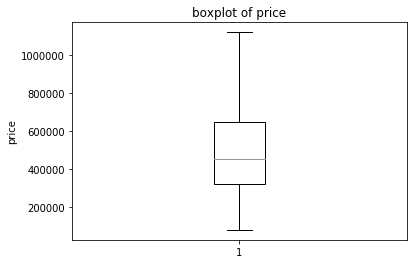

In [10]:
plt.boxplot(initial_df["price"], 0, '')
plt.title('boxplot of price')
plt.ylabel('price')
plt.show()

In [11]:
# The box plot appears reasonable, with a good chunk of the data in the middle area

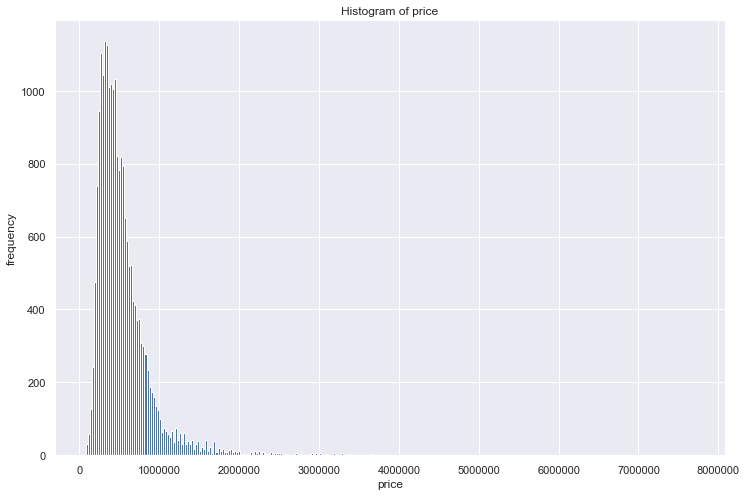

In [25]:
# create a histogram for price
fig = plt.figure(figsize = (12,8))
fig.add_subplot(111)

plt.xlabel('price')
plt.ylabel('frequency')
plt.title('Histogram of price')
initial_df.price.hist(bins=300)

plt.show()

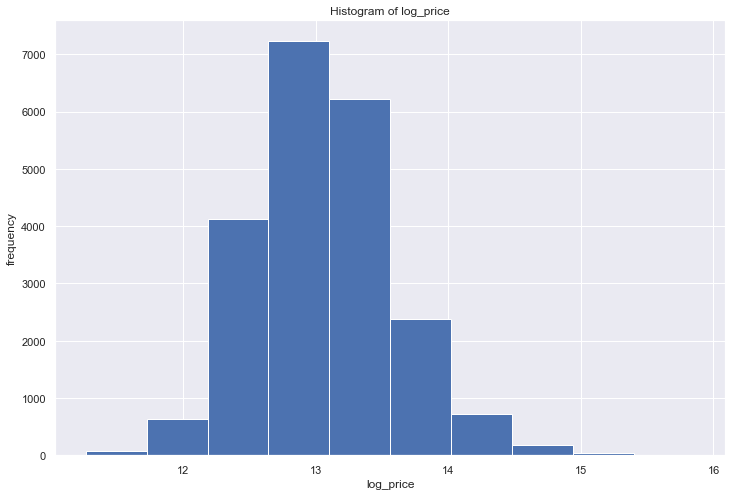

In [26]:
# there's clearly a long tail to the higher prices, with some extreme outliers.

# try converting price to a log scale and see how histogram looks
log_price = initial_df[initial_df['price']>0]
# walmart_log= walmart[walmart["Weekly_Sales"]>0]
log_price['price'] = np.log(log_price['price'])
# walmart_log["Weekly_Sales"]= np.log(walmart_log["Weekly_Sales"])

fig = plt.figure(figsize = (12,8))
fig.add_subplot(111)

plt.xlabel('log_price')
plt.ylabel('frequency')
plt.title('Histogram of log_price')
log_price.price.hist();


In [27]:
# That's a much more "normal" looking distribution
# look at price_log
log_price.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,13.048211,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,0.526555,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,11.264464,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,12.682307,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,13.017003,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,13.377006,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,15.856731,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [28]:
norm.fit(log_price.price)

(13.048210941923953, 0.5265426376308636)

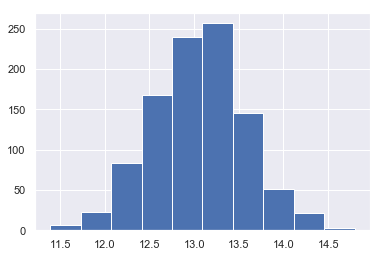

In [29]:
# look at a randomly created normal distribution with this mean and standard deviation
from numpy.random import normal
μ = 13.0482
σ = 0.5265
pd.Series(normal(loc=μ, scale=σ, size=1000)).hist();

/Users/giovanni/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


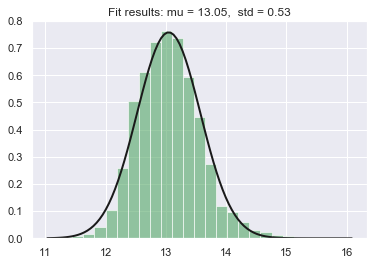

In [30]:
# from Eli's project
# Plot the histogram.
plt.hist(log_price.price, bins=25, normed=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, μ, σ)
plt.plot(x, p, 'k', linewidth=2);
title = "Fit results: mu = {:.2f},  std = {:.2f}".format(μ, σ)
plt.title(title);

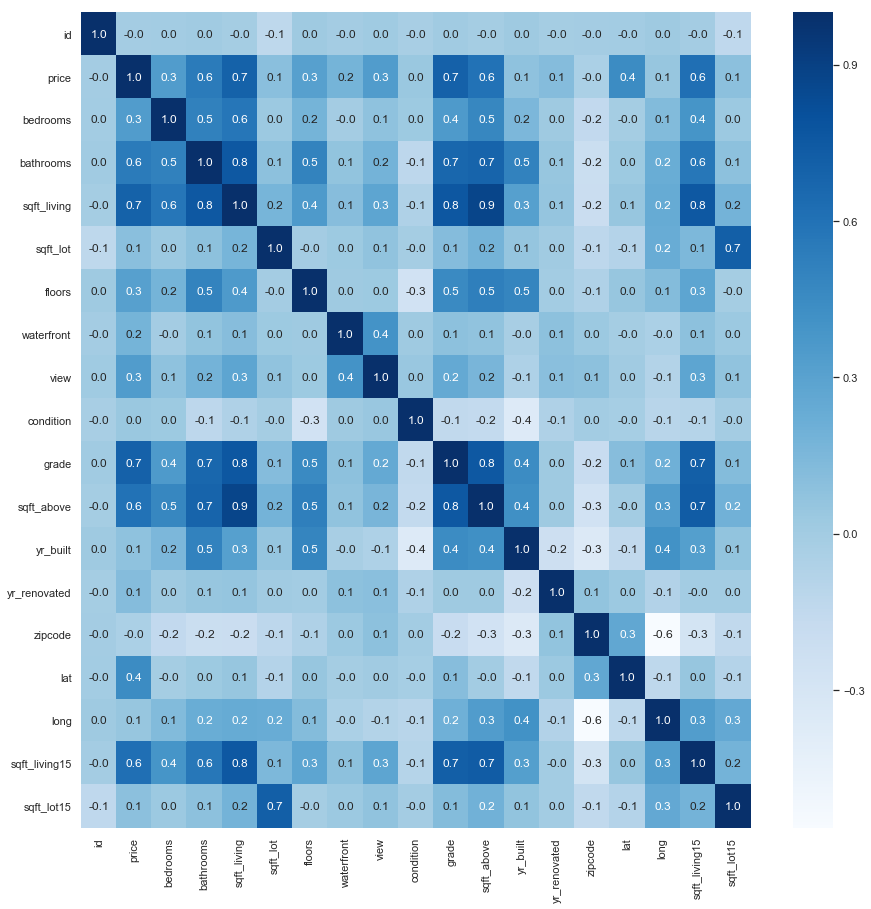

In [31]:
# look at a heatmap
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(log_price.corr(), annot=True, cmap="Blues", fmt= '.1f')
plt.show()

In [32]:
# the following factors already have a correlation to price at or above .6:
# * sqft_living15
# * sqft_above
# * grade
# * sqft_living
# * bathrooms


/Users/giovanni/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


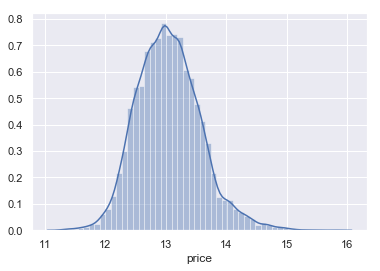

In [33]:
#Plotting a histogram using Seaborn - to check 
sns.distplot(log_price.price);

In [34]:
#Let us measure the house sales price curve characteristics: skewness and kurtosis
print("Skewness: %f" % log_price.price.skew())
print("Kurtosis: %f" % log_price.price.kurt())

Skewness: 0.431004
Kurtosis: 0.691049


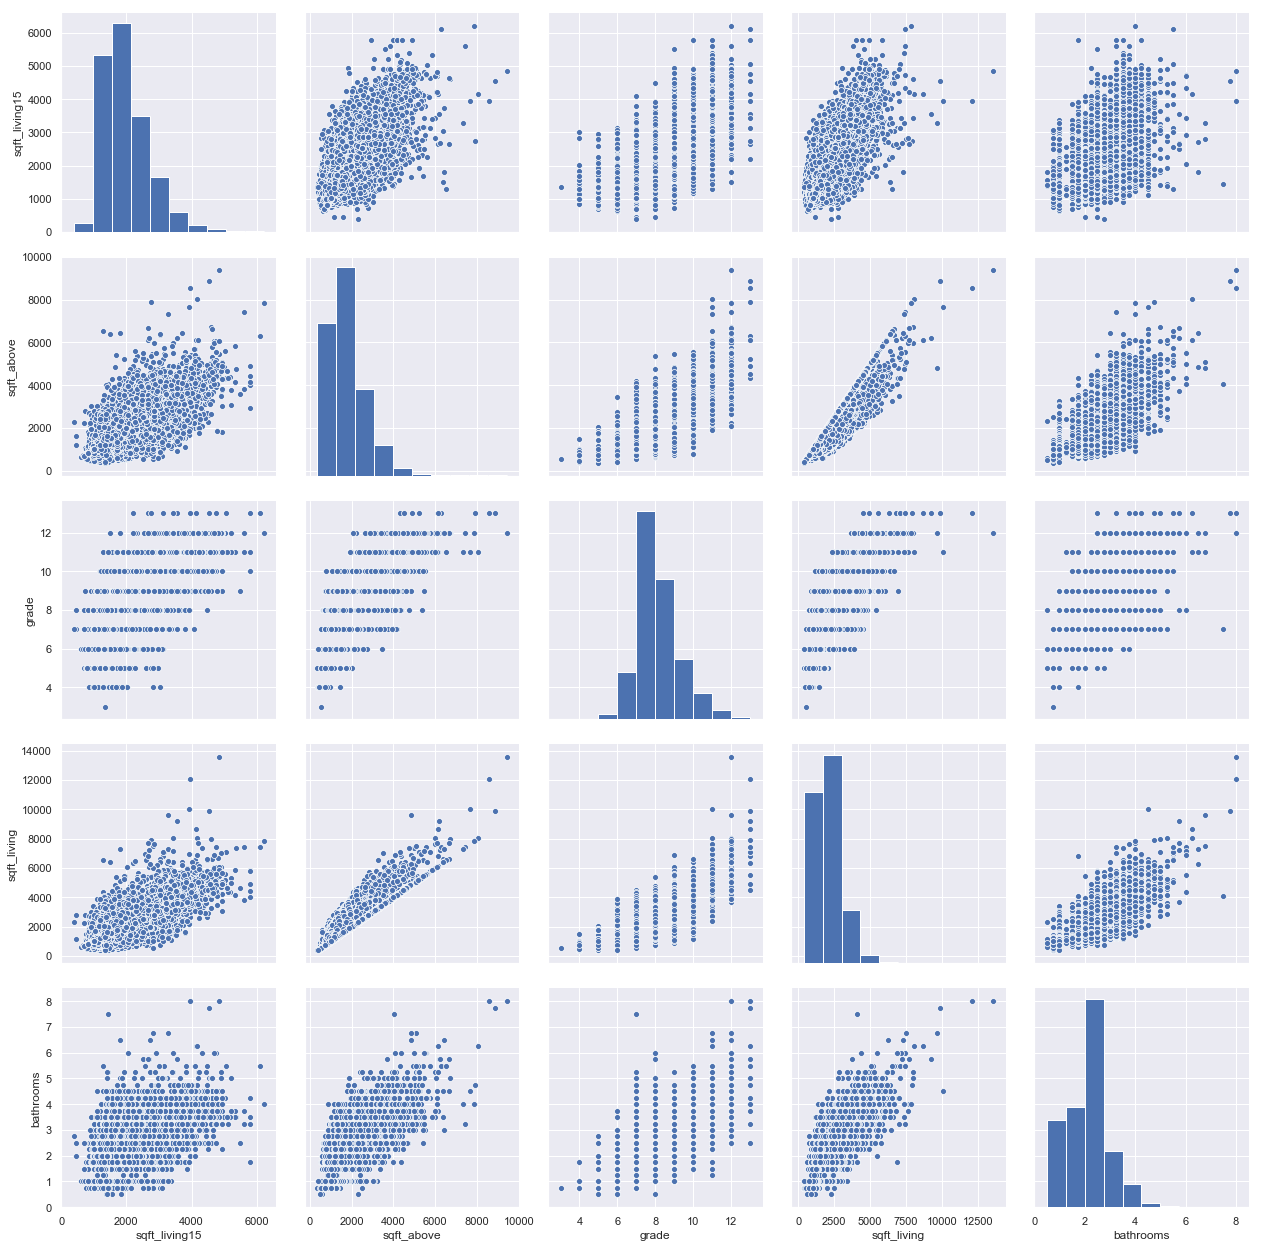

In [35]:
#Scatterplot
#https://seaborn.pydata.org/examples/scatterplot_matrix.html
sns.set()
cols = ['sqft_living15', 'sqft_above', 'grade', 'sqft_living', 'bathrooms']
sns.pairplot(log_price[cols], height = 3.5)
plt.show();

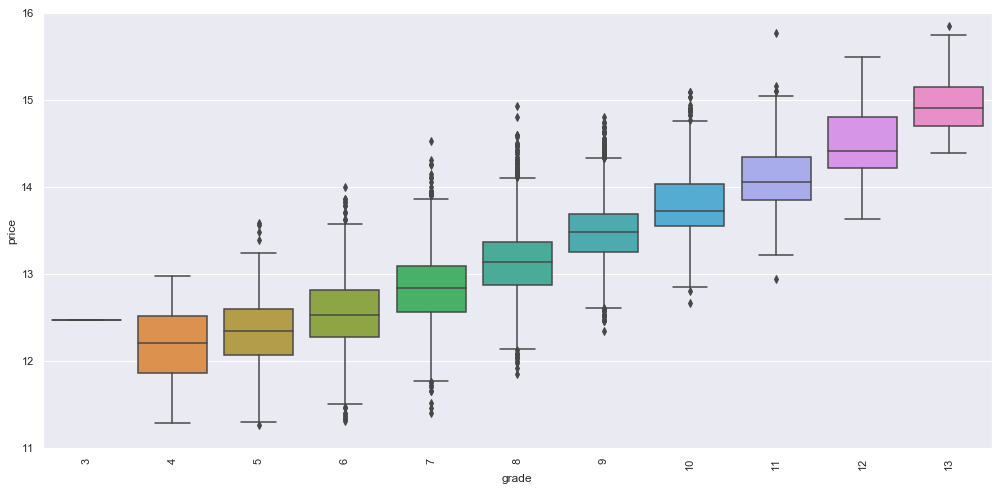

In [36]:
var = 'grade'
data = pd.concat([log_price.price, log_price[var]], axis=1)
f, ax = plt.subplots(figsize=(17, 8))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=11, ymax=16);
plt.xticks(rotation=90);

In [37]:
# grade seems to have a strong correlation to price, yet there are many outliers. 
# The boz plot shows that the middle 50% of each grade shows a very consistent correlation to price.


In [45]:
# from walmart lab
# col_names = walmart_log.describe().columns.drop(['Weekly_Sales'])
# results_log = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
# for idx, val in enumerate(col_names):
#     print ("Walmart: Weekly_Sales~" + val)
#     print ("------------------------------")
#     f = 'Weekly_Sales~' + val
#     model = smf.ols(formula=f, data=walmart_log).fit()
#     X_new = pd.DataFrame({val: [walmart_log[val].min(), walmart_log[val].max()]});
#     preds = model.predict(X_new)
#     results_log.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
#     print(results_log[idx+1])
#     print("\n")

# use the top 5 factors from the heatmap
col_names = ['sqft_living15', 'sqft_above', 'grade', 'sqft_living', 'bathrooms']
# col_names = log_price.describe().columns.drop(['price'])
results_log = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
for idx, val in enumerate(col_names):
    print ("price~" + val)
    print ("------------------------------")
    f = 'price~' + val
    model = smf.ols(formula=f, data=log_price).fit()
    X_new = pd.DataFrame({val: [log_price[val].min(), log_price[val].max()]});
    preds = model.predict(X_new)
    results_log.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
    print(results_log[idx+1])
    print("\n")

price~sqft_living15
------------------------------
['sqft_living15', 0.3835644204746945, 12.102755726015406, 0.0004759113794996623, 0.0]


price~sqft_above
------------------------------
['sqft_above', 0.3618975035607963, 12.36375650693253, 0.0003826767546828098, 0.0]


price~grade
------------------------------
['grade', 0.49522239530874346, 10.629508879817735, 0.3158434011857449, 0.0]


price~sqft_living
------------------------------
['sqft_living', 0.48328203685146887, 12.218777442526877, 0.0003987044116729477, 0.0]


price~bathrooms
------------------------------
['bathrooms', 0.30387583204123636, 12.249565138197251, 0.3774628447677676, 0.0]




In [46]:
pd.DataFrame(results_log)

,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p-value
1,sqft_living15,0.383564,12.1028,0.000475911,0
2,sqft_above,0.361898,12.3638,0.000382677,0
3,grade,0.495222,10.6295,0.315843,0
4,sqft_living,0.483282,12.2188,0.000398704,0
5,bathrooms,0.303876,12.2496,0.377463,0


In [ ]:
# next steps
# convert the cateorical factors into seperate columns, dropping one
# 